In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
data = pd.read_excel('./data/faa_wildlife_strikes.xlsx')

In [6]:
data.head()

,Airport: Code,Airport: Name,Origin State,Origin State Code,Country,Aircraft: Type,Aircraft: Number of engines,Collision Date and Time,When: Time of day,When: Phase of flight,...,Days,Feet above ground,Miles from airport,Wildlife: Animal Category,Wildlife: Species Order,Wildlife: Species Group,Wildlife: Species,Wildlife: Species ID,Number of Strikes,Record ID
0,KAAF,APALACHICOLA REGIONAL ARPT,Florida,FL,United States,NaN,NaN,2012-09-20 19:30:00,NaN,Take-off run,...,NaN,0.0,NaN,Terrestrial Mammals,Canids,"Wolves, Dogs, Foxes, Coyote",Domestic dog,1F12,1,17459
1,KAAF,APALACHICOLA REGIONAL ARPT,Florida,FL,United States,Airplane,1.0,2013-04-23 17:09:00,NaN,Take-off run,...,NaN,NaN,NaN,Birds,"Pelicans, Herons, Egrets, Bitterns, Ibises","Herons, Egrets, Bitterns","Herons, egrets, bitterns",I1,1,17114
2,KABE,LEHIGH VALLEY INTL,Pennsylvania,PA,United States,Airplane,2.0,2009-04-23 09:22:00,Day,Take-off run,...,30.000,0.0,0.0,Birds,"Caracaras, Falcons","Caracaras, Falcons",American kestrel,K5114,1,259361
3,KABE,LEHIGH VALLEY INTL,Pennsylvania,PA,United States,Airplane,2.0,2014-04-13 22:00:00,Night,Approach,...,0.625,NaN,NaN,Birds,Pigeons and Doves,Doves,Mourning dove,O2205,1,345167
4,KABE,LEHIGH VALLEY INTL,Pennsylvania,PA,United States,Airplane,2.0,2009-03-31 18:15:00,Day,Approach,...,0.500,NaN,0.0,Birds,"Hawks, Kites, Eagles, Ospreys, Vultures","Kites, Hawks, Eagles",Red-tailed hawk,K3302,1,262782


In [7]:
data.shape

(28298, 25)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28298 entries, 0 to 28297
Data columns (total 25 columns):
Airport: Code                                 28298 non-null object
Airport: Name                                 28298 non-null object
Origin State                                  28298 non-null object
Origin State Code                             28298 non-null object
Country                                       28298 non-null object
Aircraft: Type                                27467 non-null object
Aircraft: Number of engines                   25918 non-null float64
Collision Date and Time                       28298 non-null datetime64[ns]
When: Time of day                             27655 non-null object
When: Phase of flight                         27892 non-null object
Effect: Amount of damage (detailed)           28298 non-null object
Effect: Impact to flight                      28084 non-null object
Effect: Indicated Damage                      28298 non-null objec

In [9]:
data.isna().sum()

Airport: Code                                     0
Airport: Name                                     0
Origin State                                      0
Origin State Code                                 0
Country                                           0
Aircraft: Type                                  831
Aircraft: Number of engines                    2380
Collision Date and Time                           0
When: Time of day                               643
When: Phase of flight                           406
Effect: Amount of damage (detailed)               0
Effect: Impact to flight                        214
Effect: Indicated Damage                          0
Cost: Aircraft time out of service (hours)    25369
Cost: Total $                                     0
Days                                          25369
Feet above ground                              3426
Miles from airport                             8491
Wildlife: Animal Category                         0
Wildlife: Sp

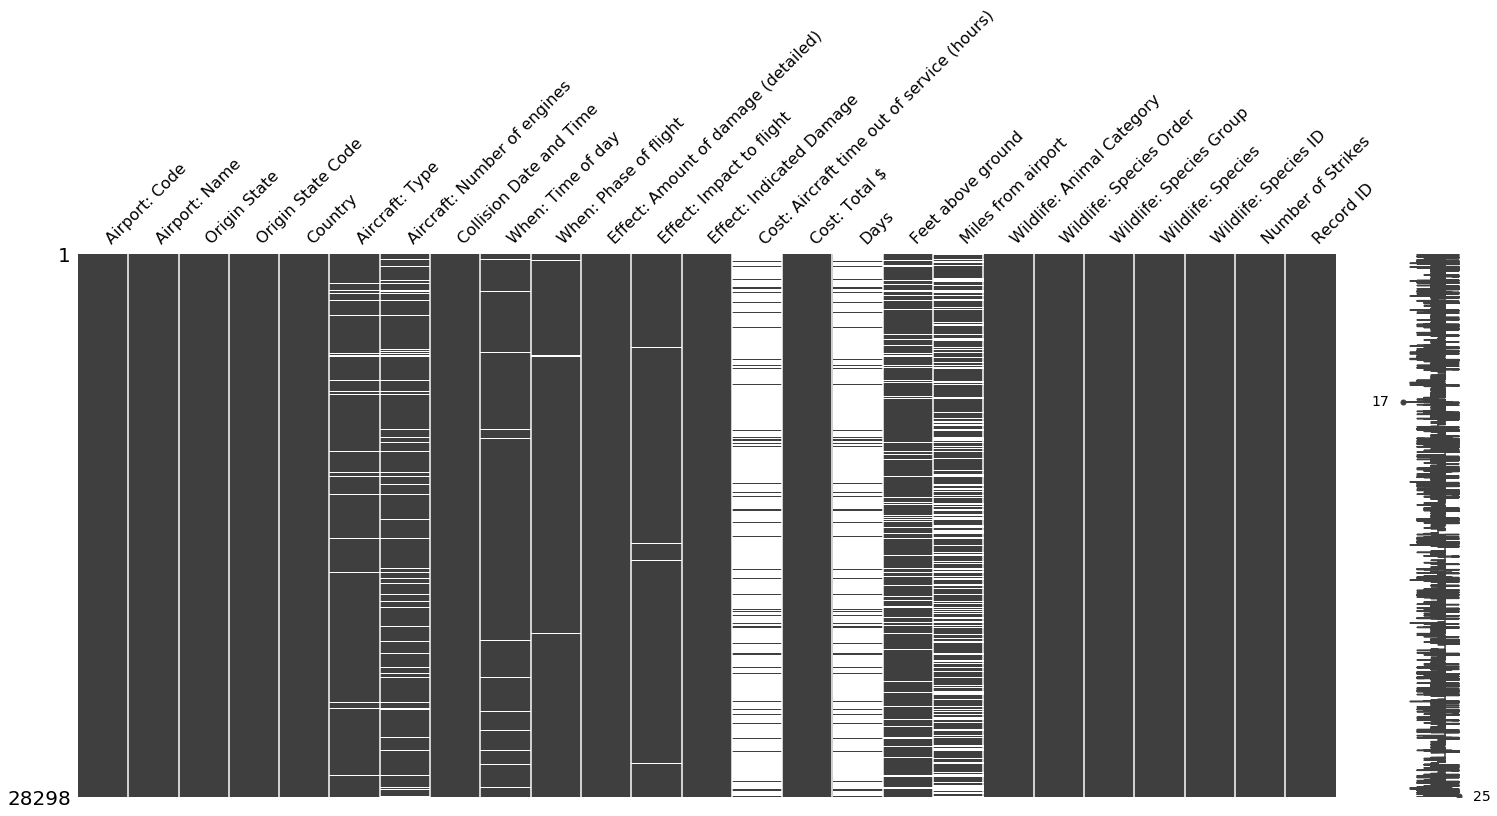

In [10]:
msno.matrix(data)

Drop columns with lots of missing values, two columns: 'Cost: Aircraft time out of service (hours)', 'Days'

In [11]:
data2 = data.drop(columns = ['Cost: Aircraft time out of service (hours)', 'Days'])

In [12]:
data2.shape

(28298, 23)

count rows with missing values

In [13]:
# data2.isnull().sum(axis=1)

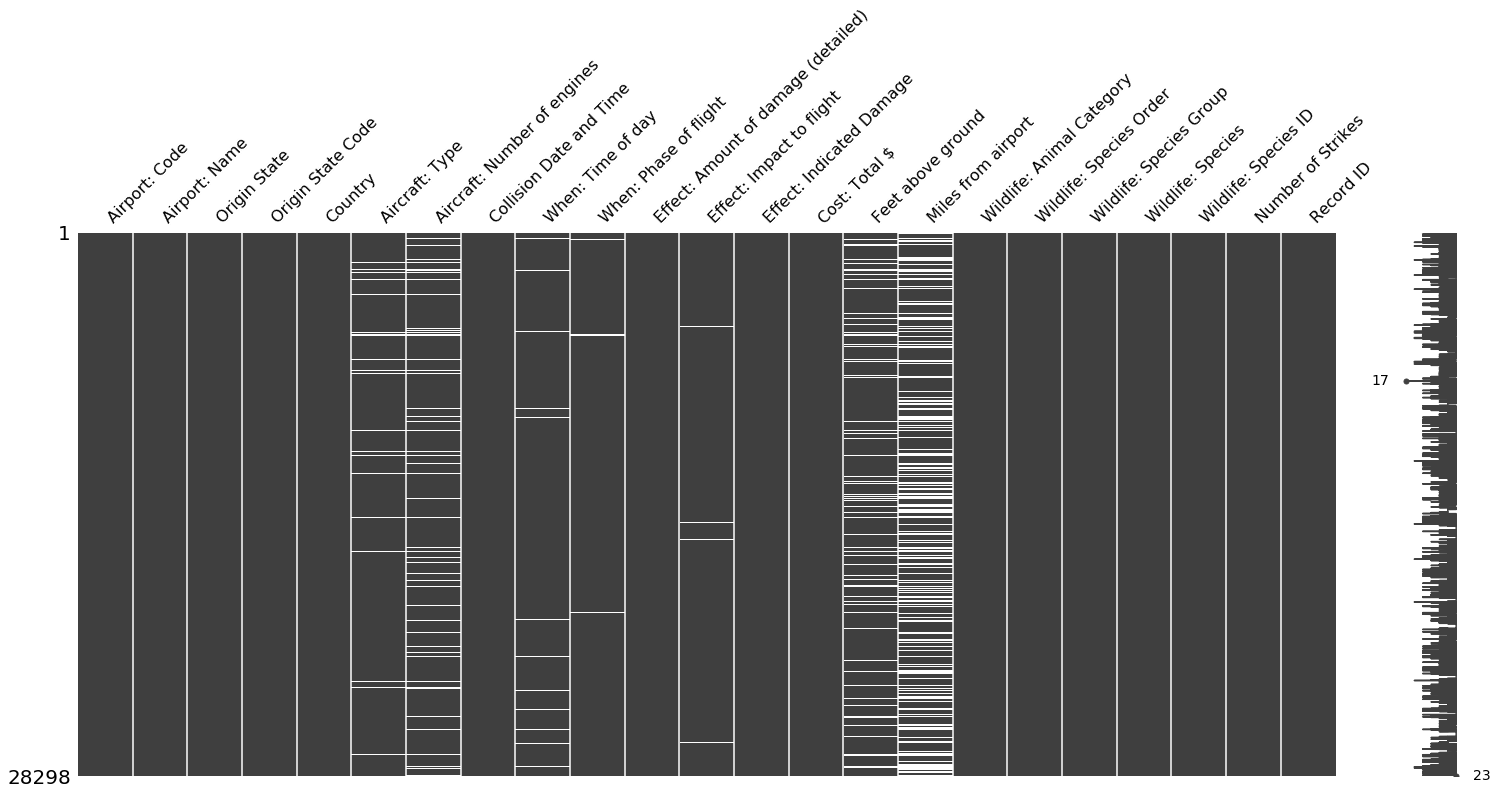

In [14]:
msno.matrix(data2)

In [15]:
data2.to_csv('strikes_clean.csv')

In [16]:
data2['Wildlife: Species'].unique()

array(['Domestic dog', 'Herons, egrets, bitterns', 'American kestrel',
       'Mourning dove', 'Red-tailed hawk', 'Gulls', 'American crow',
       'Perching birds (y)', 'Bobolink', 'Brown-headed cowbird',
       'Horned lark', 'American golden-plover', 'Killdeer', 'Hawks',
       'Grasshopper sparrow', 'Sparrows', 'European starling',
       'Bank swallow', 'Barn swallow', 'Cliff swallow', 'Swallows',
       'Tree swallow', 'American robin', 'Woodchuck', 'Ring-billed gull',
       'Canada goose', 'White-throated sparrow', 'Cedar waxwing',
       'Snow goose', 'Little brown bat', 'Snowy owl', 'Striped skunk',
       'Silver-haired bat', 'Ducks', 'Scissor-tailed flycatcher',
       'Perching birds (z)', 'Turkey vulture', 'Eastern meadowlark',
       'Cardinals, buntings, sparrows', "McCown's longspur",
       'Cave swallow', 'Blue-headed vireo', 'Burrowing owl', 'Coyote',
       'House finch', 'Western meadowlark', 'Rock pigeon',
       'Peregrine falcon', 'Black-tailed jackrabbit',
    

In [17]:
len(data2['Wildlife: Species'].unique())


469

In [18]:
data2.describe()

,Aircraft: Number of engines,Cost: Total $,Feet above ground,Miles from airport,Number of Strikes,Record ID
count,25918.000000,2.829800e+04,24872.000000,19807.000000,28298.0,28298.000000
mean,2.004707,1.138458e+04,338.847178,0.475153,1.0,271474.355184
std,0.369028,3.125356e+05,1064.706230,2.566334,0.0,81858.894925
min,1.000000,0.000000e+00,0.000000,0.000000,1.0,1164.000000
25%,2.000000,0.000000e+00,0.000000,0.000000,1.0,235364.000000
50%,2.000000,0.000000e+00,0.000000,0.000000,1.0,301697.000000
75%,2.000000,0.000000e+00,100.000000,0.000000,1.0,330425.250000
max,4.000000,4.107158e+07,20000.000000,100.000000,1.0,360842.000000


In [19]:
import matplotlib.pyplot as plt

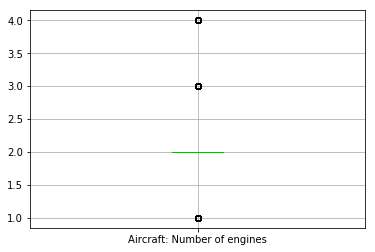

In [20]:
data2.boxplot('Aircraft: Number of engines')

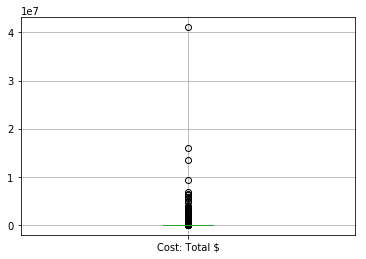

In [21]:
data2.boxplot('Cost: Total $')

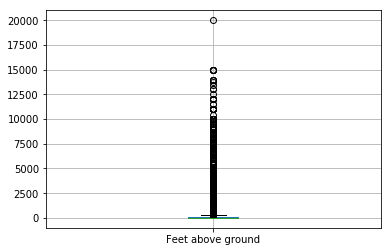

In [22]:
data2.boxplot('Feet above ground')

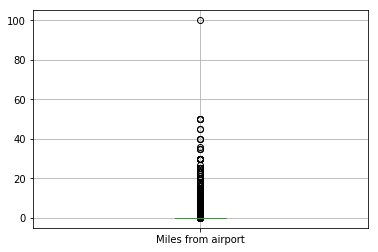

In [23]:
data2.boxplot('Miles from airport')

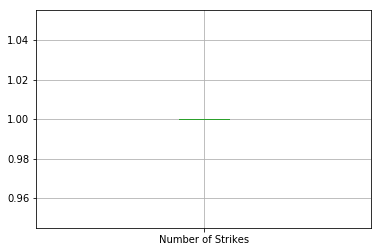

In [24]:
data2.boxplot('Number of Strikes')

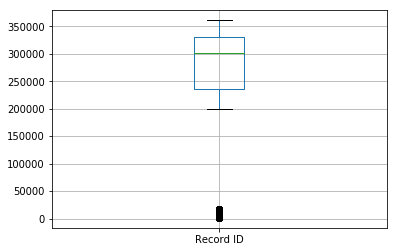

In [25]:
data2.boxplot('Record ID')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a174ca358>,
      dtype=object)

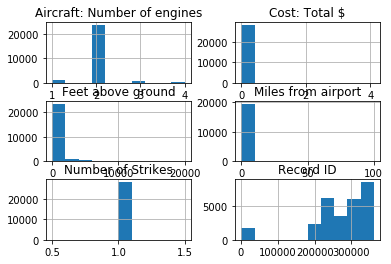

In [26]:
data2.hist()

Wildlife: Animal Category
Bats                   [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Birds                  [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Reptiles               [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Terrestrial Mammals    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

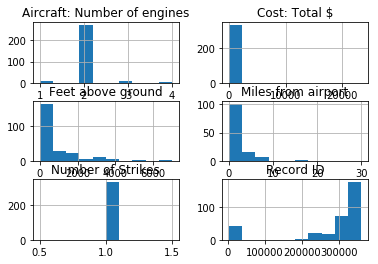

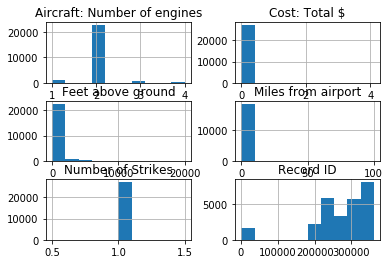

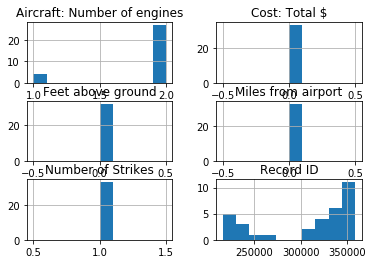

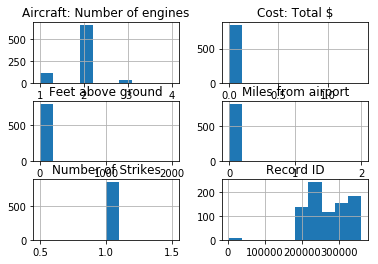

In [27]:
data2.groupby('Wildlife: Animal Category').hist()

/Users/svenja/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Wildlife: Species Order
Alligators, Crocodiles                            [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Armadillos                                        [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Bats                                              [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Canids                                            [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Caracaras, Falcons                                [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Cranes, Rails, and Coots                          [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Deer, Elk, Moose                                  [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Ducks, Geese, Swans, Waterfowl                    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Felids                                            [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
Frigatebirds, Cormorants, Darters                 [[AxesSubplot(0.125,0.6702

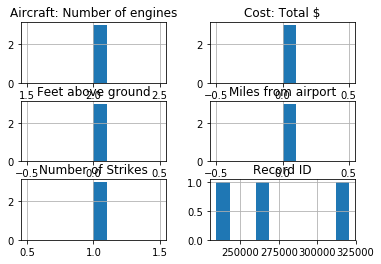

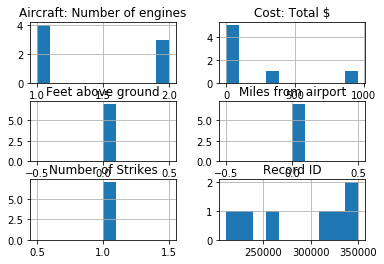

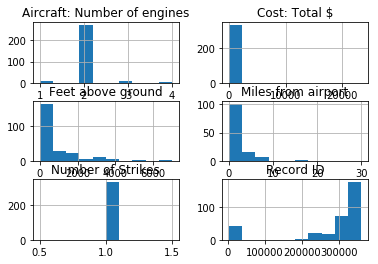

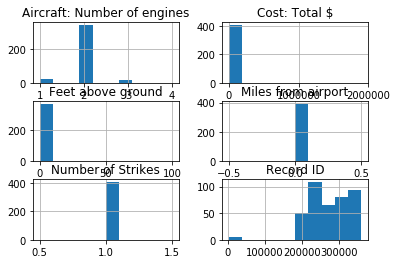

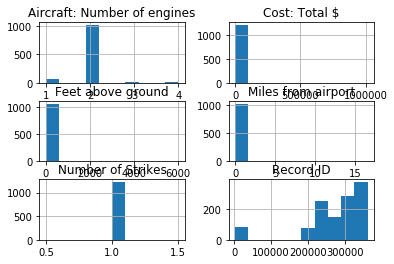

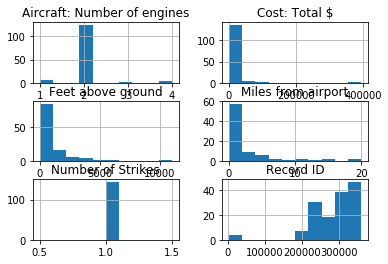

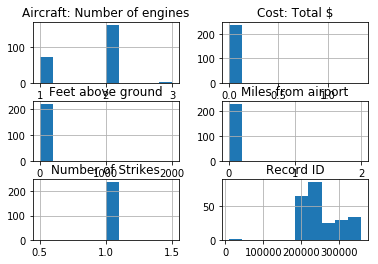

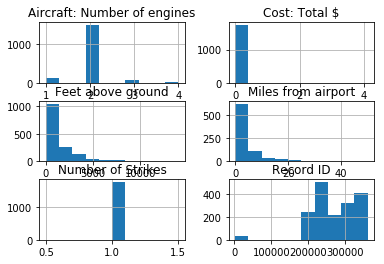

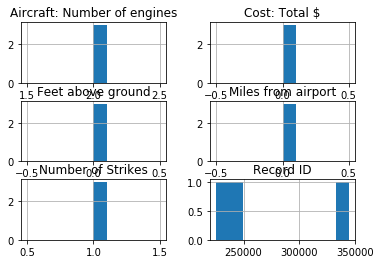

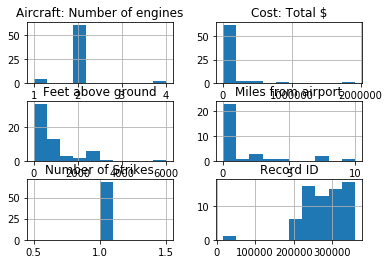

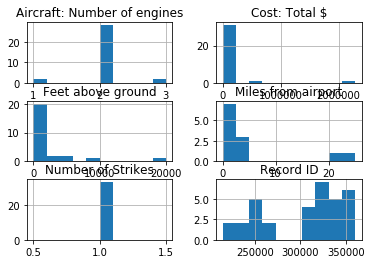

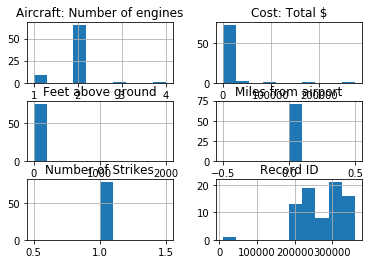

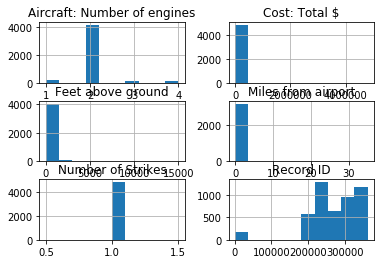

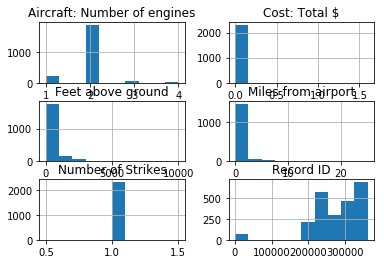

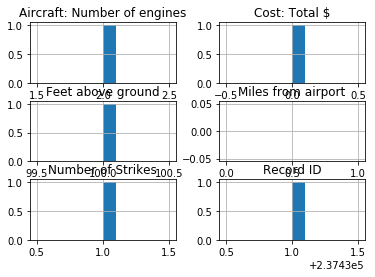

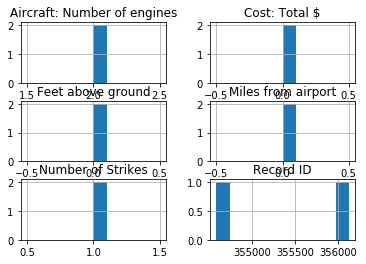

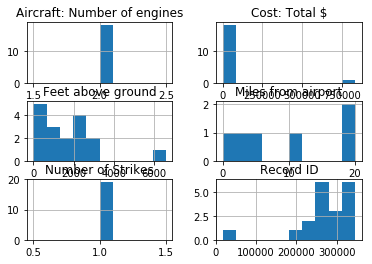

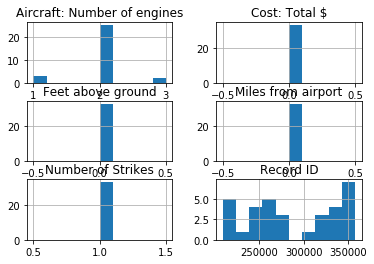

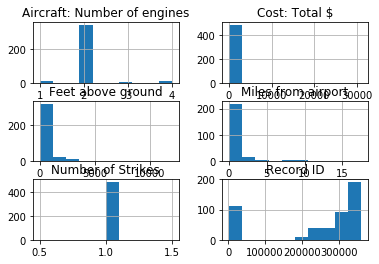

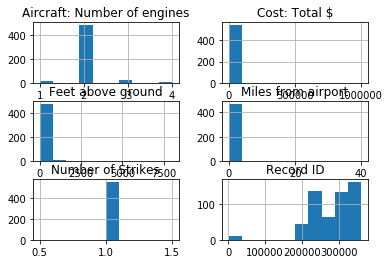

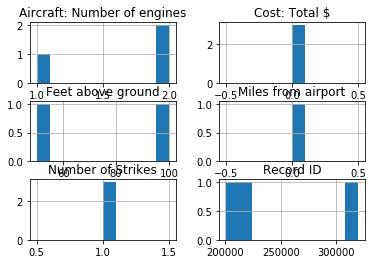

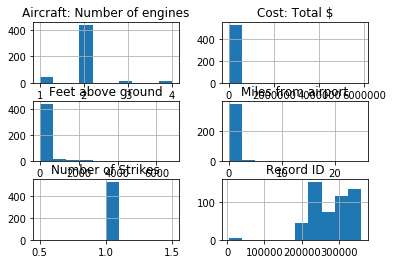

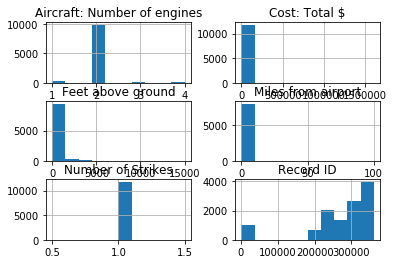

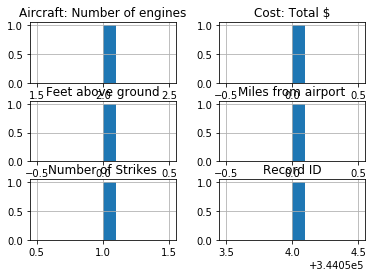

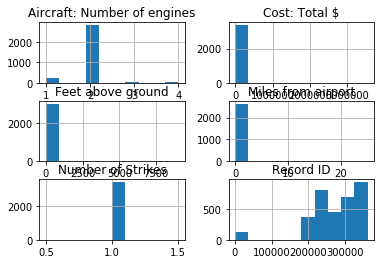

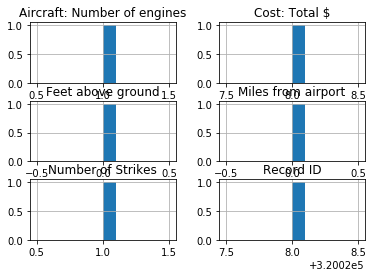

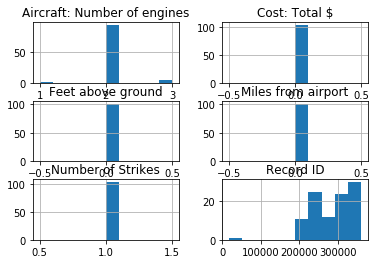

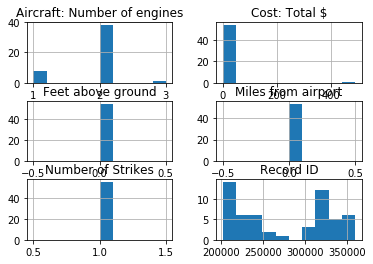

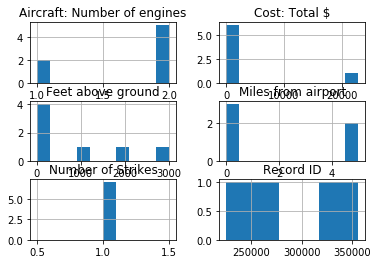

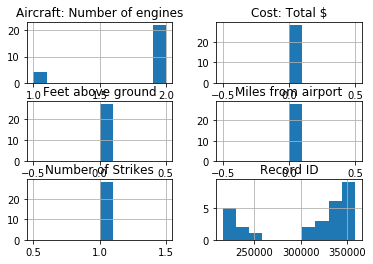

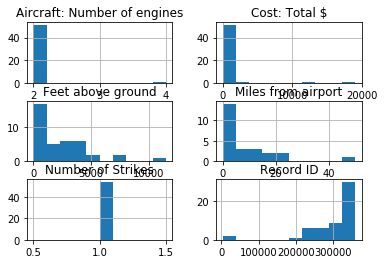

In [28]:
data2.groupby('Wildlife: Species Order').hist()

In [29]:
# import numpy as np

# q1 = np.percentile(census.FamilyWork, 25)
# q3 = np.percentile(census.FamilyWork, 75)
# iqr = q3 - q1
# upper_fence = q3 + 3 * iqr
# lower_fence = q1 - 3 * iqr
# census_without_outliers = census[(census.FamilyWork < upper_fence) & (census.FamilyWork > lower_fence)]
# census_without_outliers

In [30]:
import numpy as np

In [31]:
q1 = np.percentile(data2['Cost: Total $'], 25)
q3 = np.percentile(data2['Cost: Total $'], 75)
iqr = q3 - q1
upper_fence = q3 + 3 * iqr
lower_fence = q1 - 3 * iqr
data2_without_outliers = data2[(data2['Cost: Total $'] < upper_fence) & (data2['Cost: Total $'] > lower_fence)]
data2_without_outliers

,Airport: Code,Airport: Name,Origin State,Origin State Code,Country,Aircraft: Type,Aircraft: Number of engines,Collision Date and Time,When: Time of day,When: Phase of flight,...,Cost: Total $,Feet above ground,Miles from airport,Wildlife: Animal Category,Wildlife: Species Order,Wildlife: Species Group,Wildlife: Species,Wildlife: Species ID,Number of Strikes,Record ID


In [32]:
q1

0.0

In [33]:
q3

0.0

In [34]:
np.percentile(data2['Cost: Total $'], 75)

0.0

In [35]:
np.percentile(data2['Cost: Total $'], 94)

0.0

In [36]:
print(round(np.percentile(data2['Cost: Total $'], 94), 0))
print(round(np.percentile(data2['Cost: Total $'], 95), 0))
print(round(np.percentile(data2['Cost: Total $'], 96), 0))
print(round(np.percentile(data2['Cost: Total $'], 97), 0))
print(round(np.percentile(data2['Cost: Total $'], 98), 0))
print(round(np.percentile(data2['Cost: Total $'], 99), 0))
print(round(np.percentile(data2['Cost: Total $'], 100), 0))

0.0
114.0
666.0
7606.0
32292.0
109772.0
41071585.0


In [37]:
data2['Effect: Amount of damage (detailed)'].unique()

array(['None', 'Medium', 'Minor', 'Substantial', 'Destroyed'],
      dtype=object)

In [44]:
data2['Effect: Amount of damage (detailed)'].value_counts()

None           25187
Minor           1514
Substantial      955
Medium           609
Destroyed         33
Name: Effect: Amount of damage (detailed), dtype: int64

In [38]:
data2['Effect: Indicated Damage'].unique()

array(['No damage', 'Caused damage'], dtype=object)

In [43]:
data2['Effect: Indicated Damage'].value_counts()

No damage        25187
Caused damage     3111
Name: Effect: Indicated Damage, dtype: int64

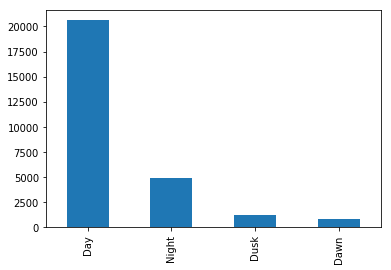

In [49]:
data2['When: Time of day'].value_counts().plot.bar()

In [ ]:
#data2.plot.bar()

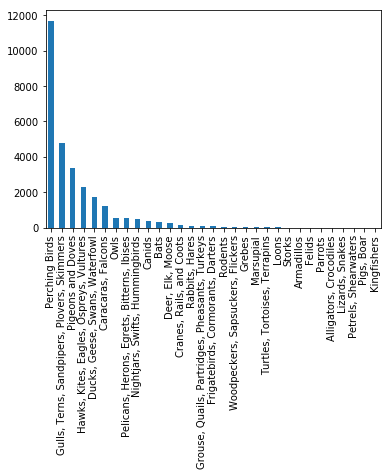

In [58]:
data2['Wildlife: Species Order'].value_counts().plot.bar()

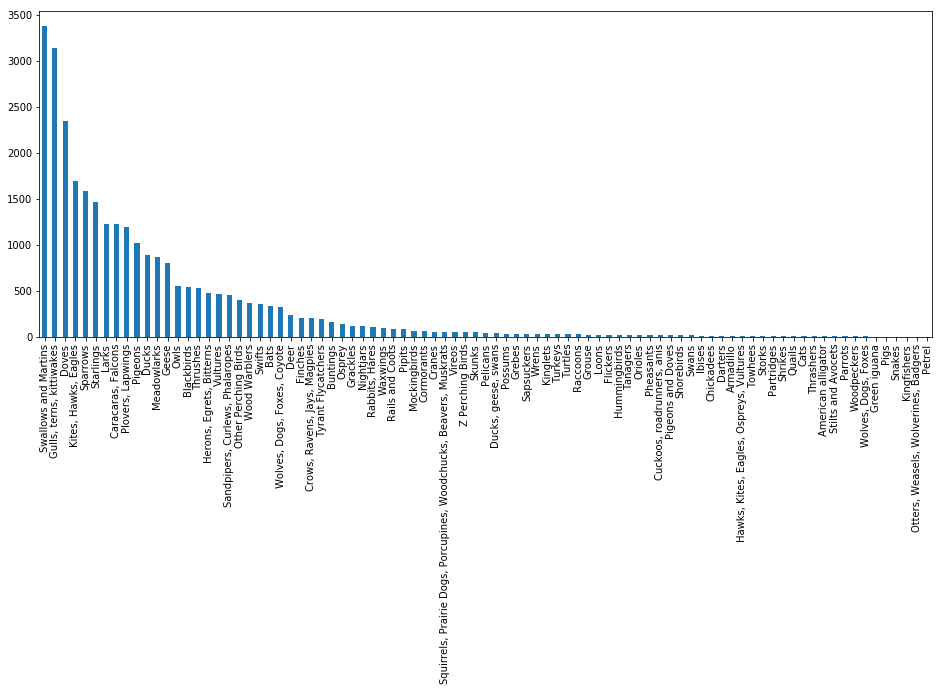

In [68]:
data2['Wildlife: Species Group'].value_counts().plot.bar(figsize=(16,6))

In [71]:
data2.groupby('Wildlife: Species Group').agg(['min', 'max'])

Airport: Code        \
                                                             min   max   
Wildlife: Species Group                                                  
American alligator                                          KRSW  KRSW   
Armadillo                                                   KDAB  KTPA   
Bats                                                        KABE  KUNV   
Blackbirds                                                  KABE  KYNG   
Buntings                                                    KACY  KTUS   
Caracaras, Falcons                                          KABE  KYNG   
Cats                                                        KBUF  KSNA   
Chickadees                                                  KALB  KPWM   
Cormorants                                                  KACK  KSNA   
Cranes                                                      KABQ  KVRB   
Crows, Ravens, Jays, Magpies                                KABE  KWWD   
Cuckoos, roadrunners, anis                                  KBHM  KRDU   
Darters                                                     KEFD  KSRQ   
Deer                                                        KACK  KVSF   
Doves                                                       KABE  KYIP   
Ducks                                                       KABI  KYNG   
Ducks, geese, swans                                         KAFW  KSTL   
Finches                                                     KABI  KUNV   
Flickers                                                    KBHM  KUNV   
Geese                                                       KABE  KYIP   
Grackles                                                    KADS  KYIP   
Grebes                                                      KAST  KTUL   
Green iguana                                                KEYW  KEYW   
Grouse                                                      KGFK  KVTN   
Gulls, terns, kittiwakes                                    KABE  KYNG   
Hawks, Kites, Eagles, Ospreys, Vultures                     KAFW  KRIC   
Herons, Egrets, Bitterns                                    KAAF  KYKM   
Hummingbirds                                                KCLT  KTOL   
Ibises                                                      KBCT  KTMB   
Kingfishers                                                 KMCO  KMCO   
...                                                          ...   ...   
Sandpipers, Curlews, Phalaropes                             KABR  KYNG   
Sapsuckers                                                  KACY  KUNV   
Shorebirds                                                  KBDR  KSUX   
Shrikes                                                     KBPT  KSBA   
Skunks                                                      KABE  KVNY   
Snakes                                                      KMLB  KMLB   
Sparrows                                                    KABE  KYNG   
Squirrels, Prairie Dogs, Porcupines, Woodchucks...          KABE  KTOL   
Starlings                                                   KABE  KYNG   
Stilts and Avocets                                          KDEN  KSLC   
Storks                                                      KFLL  KTMB   
Swallows and Martins                                        KABE  KYNG   
Swans                                                       KAZO  KSMF   
Swifts                                                      KAEX  KYNG   
Tanagers                                                    KATL  KTEB   
Thrashers                                                   KATW  KCSG   
Thrushes                                                    KABE  KYNG   
Towhees                                                     KAXS  KRNO   
Turkeys                                                     KBGM  KWST   
Turtles                                                     KAUS  KSFB   
Tyrant Flycatchers                                     

In [74]:
data2.groupby('Wildlife: Species Group').agg(['mean'])

,Aircraft: Number of engines,Cost: Total $,Feet above ground,Miles from airport,Number of Strikes,Record ID
,mean,mean,mean,mean,mean,mean
Wildlife: Species Group,,,,,,
American alligator,2.000000,0.000000,0.000000,0.000000,1,272275.666667
Armadillo,1.428571,186.000000,0.000000,0.000000,1,291581.000000
Bats,2.037931,85.367470,913.658730,2.117424,1,282927.174699
Blackbirds,2.027833,405.242991,318.894410,0.315942,1,254324.863551
Buntings,2.075342,288.944099,82.537931,0.153125,1,272268.968944
"Caracaras, Falcons",1.986351,1796.360656,35.996303,0.032132,1,271821.445902
Cats,2.000000,0.000000,0.000000,0.000000,1,273044.000000
Chickadees,2.000000,0.000000,233.636364,0.000000,1,267262.818182


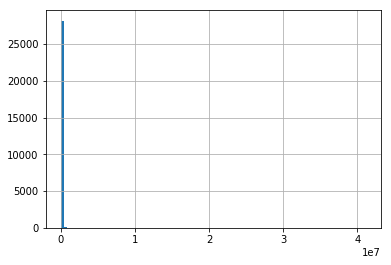

In [79]:
data2['Cost: Total $'].hist(bins=100)

In [88]:
data3 = data2.replace(0, np.NaN)

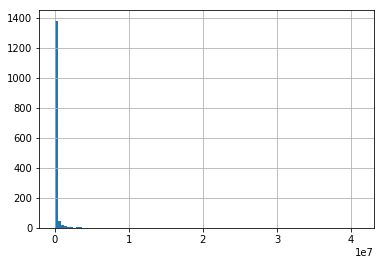

In [89]:
data3['Cost: Total $'].hist(bins=100)

In [101]:
data4 = data3[data3['Cost: Total $'] > 1000000]

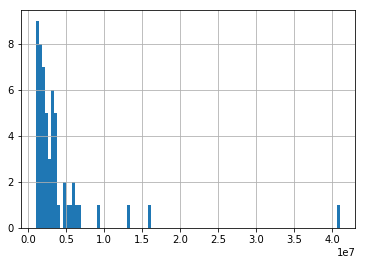

In [102]:
data4['Cost: Total $'].hist(bins=100)

In [114]:
percent_missing = data2.isnull().sum() * 100 / len(data2)
percent_missing

Airport: Code                           0.000000
Airport: Name                           0.000000
Origin State                            0.000000
Origin State Code                       0.000000
Country                                 0.000000
Aircraft: Type                          2.936603
Aircraft: Number of engines             8.410488
Collision Date and Time                 0.000000
When: Time of day                       2.272245
When: Phase of flight                   1.434730
Effect: Amount of damage (detailed)     0.000000
Effect: Impact to flight                0.756237
Effect: Indicated Damage                0.000000
Cost: Total $                           0.000000
Feet above ground                      12.106863
Miles from airport                     30.005654
Wildlife: Animal Category               0.000000
Wildlife: Species Order                 0.000000
Wildlife: Species Group                 0.000000
Wildlife: Species                       0.000000
Wildlife: Species ID

In [118]:
# rows with more than two missing values
len(data2.loc[data2.isnull().sum(1)>1].index)

3929

In [119]:
len(data2.loc[data2.isnull().sum(1)>2].index)

1182

In [120]:
len(data2.loc[data2.isnull().sum(1)>3].index)

504

In [121]:
len(data2.loc[data2.isnull().sum(1)>4].index)

32

In [122]:
len(data2.loc[data2.isnull().sum(1)>1].index) - len(data2.loc[data2.isnull().sum(1)>2].index)

2747

In [123]:
# maybe drop all rows with 2 missing values or more, predict one missing value per row, would preserve 2747 entries

In [131]:
data2_drop_larger_1 = data2.dropna(thresh=data2.shape[1]-2)

In [132]:
data2_drop_larger_1.isnull().sum()

Airport: Code                             0
Airport: Name                             0
Origin State                              0
Origin State Code                         0
Country                                   0
Aircraft: Type                          311
Aircraft: Number of engines            1331
Collision Date and Time                   0
When: Time of day                       254
When: Phase of flight                   147
Effect: Amount of damage (detailed)       0
Effect: Impact to flight                165
Effect: Indicated Damage                  0
Cost: Total $                             0
Feet above ground                      2592
Miles from airport                     7508
Wildlife: Animal Category                 0
Wildlife: Species Order                   0
Wildlife: Species Group                   0
Wildlife: Species                         0
Wildlife: Species ID                      0
Number of Strikes                         0
Record ID                       

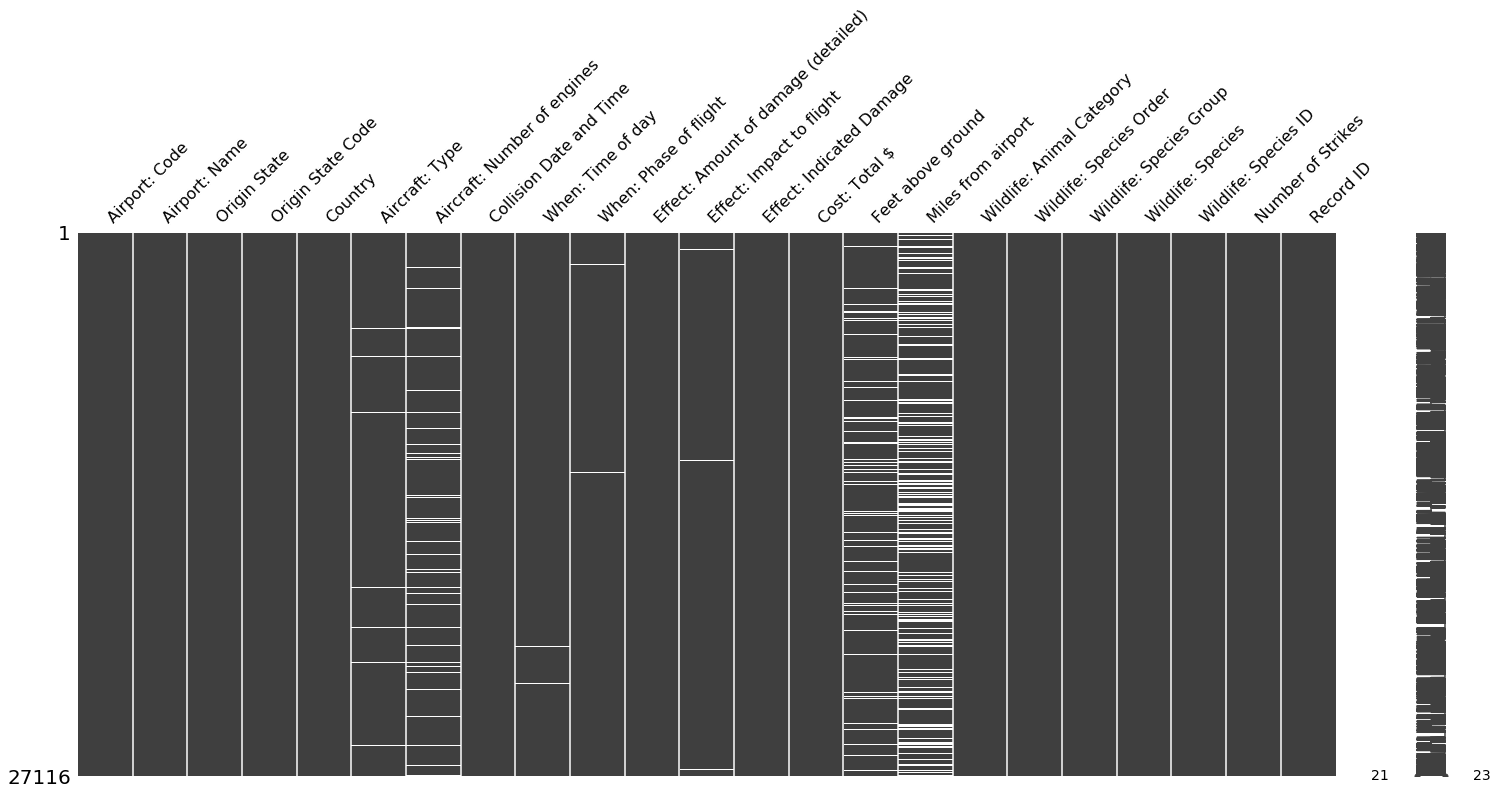

In [133]:
msno.matrix(data2_drop_larger_1)

In [136]:
data2_drop_larger_1.shape

(27116, 23)

In [137]:
data2.shape

(28298, 23)

In [139]:
# number of columns with more than one missing value (droped)
data2.shape[0] - data2_drop_larger_1.shape[0]

1182

In [140]:
percent_missing_after_drop = data2_drop_larger_1.isnull().sum() * 100 / len(data2_drop_larger_1)
percent_missing_after_drop

Airport: Code                           0.000000
Airport: Name                           0.000000
Origin State                            0.000000
Origin State Code                       0.000000
Country                                 0.000000
Aircraft: Type                          1.146924
Aircraft: Number of engines             4.908541
Collision Date and Time                 0.000000
When: Time of day                       0.936716
When: Phase of flight                   0.542115
Effect: Amount of damage (detailed)     0.000000
Effect: Impact to flight                0.608497
Effect: Indicated Damage                0.000000
Cost: Total $                           0.000000
Feet above ground                       9.558932
Miles from airport                     27.688450
Wildlife: Animal Category               0.000000
Wildlife: Species Order                 0.000000
Wildlife: Species Group                 0.000000
Wildlife: Species                       0.000000
Wildlife: Species ID

Predicting missing values

In [147]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [142]:
data_with_null = data2_drop_larger_1[['Aircraft: Type', 'Aircraft: Number of engines', 'When: Time of day', 'When: Phase of flight', 'Effect: Impact to flight', 'Feet above ground', 'Miles from airport']].dropna()

In [143]:
data_without_null = data2_drop_larger_1.dropna()

In [144]:
# all features except 'Miles from airport'
train_data_x = data_without_null.iloc[:,:6]

In [145]:
# only 'Miles from airport'
train_data_y = data_without_null.iloc[:,6]

In [148]:
# training with the available data
linreg.fit(train_data_x, train_data_y)

ValueError: could not convert string to float: 'KABE'